In [ ]:
from pathlib import Path
import imghdr

from pathlib import Path
import imghdr

img_link=list(Path("/Users/leartbaca/Documents/TKU/IPCV/data").glob(r'**/*.jpg'))
#Delete corrupted files
count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)

In [40]:
# import libraries
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object without augmentation
# datagen = ImageDataGenerator(rescale=1./255) 
# Create an ImageDataGenerator object with augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


# Load training images 
train_generator = datagen.flow_from_directory(
    '/Users/leartbaca/Documents/TKU/IPCV/data/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


# Load validation images
valid_generator = datagen.flow_from_directory(
    '/Users/leartbaca/Documents/TKU/IPCV/data/valid/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load test images
test_generator = datagen.flow_from_directory(
    '/Users/leartbaca/Documents/TKU/IPCV/data/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 595 images belonging to 10 classes.
Found 72 images belonging to 10 classes.
Found 77 images belonging to 10 classes.


In [41]:
#import libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Building the model and displaying the results
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax')) 
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [42]:
#import libraries
from keras.optimizers import RMSprop

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# Training the basic model 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10, # Change the number of steps per epoch
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 # Change the number of validation steps
)


/var/folders/8x/2l96kkzn7hs053kqw5nwhwxw0000gn/T/ipykernel_7474/4159989566.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
10/10 [==============================] - 33s 3s/step - loss: 3.2304 - accuracy: 0.1140 - val_loss: 2.3018 - val_accuracy: 0.1562
Epoch 2/30
10/10 [==============================] - 34s 3s/step - loss: 2.3055 - accuracy: 0.1187 - val_loss: 2.3038 - val_accuracy: 0.1406
Epoch 3/30
10/10 [==============================] - 41s 4s/step - loss: 2.3102 - accuracy: 0.1219 - val_loss: 2.2910 - val_accuracy: 0.1719
Epoch 4/30
10/10 [==============================] - 37s 4s/step - loss: 2.4111 - accuracy: 0.1250 - val_loss: 2.2769 - val_accuracy: 0.2344
Epoch 5/30
10/10 [==============================] - 37s 4s/step - loss: 2.2971 - accuracy: 0.1312 - val_loss: 2.2849 - val_accuracy: 0.1562
Epoch 6/30
10/10 [==============================] - 37s 4s/step - loss: 2.2609 - accuracy: 0.1813 - val_loss: 2.1863 - val_accuracy: 0.2344
Epoch 7/30
10/10 [==============================] - 30s 3s/step - loss: 2.3884 - accuracy: 0.1857 - val_loss: 2.2720 - val_accuracy: 0.1562
Epoch 8/30
10/10 [==

In [60]:
# Importing the ResNet50 model and the ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.optimizers import Adam


In [61]:
# Loading the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [62]:
# Freezing the layers of the model to prevent them from being updated during training
for layer in model.layers:
    layer.trainable = False

In [63]:
# Adding a fully-connected layer with 512 units on top of the ResNet50 model
x = model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)

In [64]:
# Adding a final layer with 10 units for the 10 dog breeds
predictions = Dense(10, activation='softmax')(x)

In [65]:
# Creating a new model with the layers from the ResNet50 model and the fully-connected layer
model = Model(inputs=model.input, outputs=predictions)


In [67]:
# Compiling the model with a categorical cross-entropy loss and an Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [68]:
# Defining the directories for the train, validation, and test sets
train_dir = '/Users/leartbaca/Documents/TKU/IPCV/data/train/'
valid_dir = '/Users/leartbaca/Documents/TKU/IPCV/data/valid/'
test_dir = '/Users/leartbaca/Documents/TKU/IPCV/data/test/'

In [69]:
# Creating image generators for the train, validation, and test sets
# Without augmentation
train_datagen = ImageDataGenerator(rescale=1./255) 
# With augmentation
#train_datagen = ImageDataGenerator(rescale=1./255,
                             #rotation_range=40,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             #shear_range=0.2,
                             #zoom_range=0.2,
                             #horizontal_flip=True,
                             #fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
# Creating generators for the train sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
#)


Found 595 images belonging to 10 classes.


In [71]:
# Creating generatiors for validation sets
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 72 images belonging to 10 classes.


In [72]:
# Creating a generator for test sets
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 77 images belonging to 10 classes.


In [73]:
# Training the model using the train generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=valid_generator,
    validation_steps=len(valid_generator))

/var/folders/8x/2l96kkzn7hs053kqw5nwhwxw0000gn/T/ipykernel_7474/3777616139.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
19/19 [==============================] - 89s 4s/step - loss: 23.7948 - accuracy: 0.1042 - val_loss: 8.0785 - val_accuracy: 0.1528
Epoch 2/30
19/19 [==============================] - 68s 4s/step - loss: 5.3601 - accuracy: 0.1882 - val_loss: 3.9302 - val_accuracy: 0.1250
Epoch 3/30
19/19 [==============================] - 66s 3s/step - loss: 2.6899 - accuracy: 0.1782 - val_loss: 2.6993 - val_accuracy: 0.1389
Epoch 4/30
19/19 [==============================] - 65s 3s/step - loss: 2.1704 - accuracy: 0.2605 - val_loss: 2.4692 - val_accuracy: 0.2361
Epoch 5/30
19/19 [==============================] - 64s 3s/step - loss: 2.0621 - accuracy: 0.2807 - val_loss: 2.3973 - val_accuracy: 0.1806
Epoch 6/30
19/19 [==============================] - 63s 3s/step - loss: 1.9075 - accuracy: 0.3345 - val_loss: 2.1562 - val_accuracy: 0.2222
Epoch 7/30
19/19 [==============================] - 64s 3s/step - loss: 1.9235 - accuracy: 0.3429 - val_loss: 2.2329 - val_accuracy: 0.2500
Epoch 8/30
19/19 [=

In [74]:
# Evaluating the model using the test generator
scores = model.evaluate_generator(test_generator, len(test_generator))
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

/var/folders/8x/2l96kkzn7hs053kqw5nwhwxw0000gn/T/ipykernel_7474/1559970086.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, len(test_generator))


Test loss: 2.6826720237731934
Test accuracy: 0.2857142984867096


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

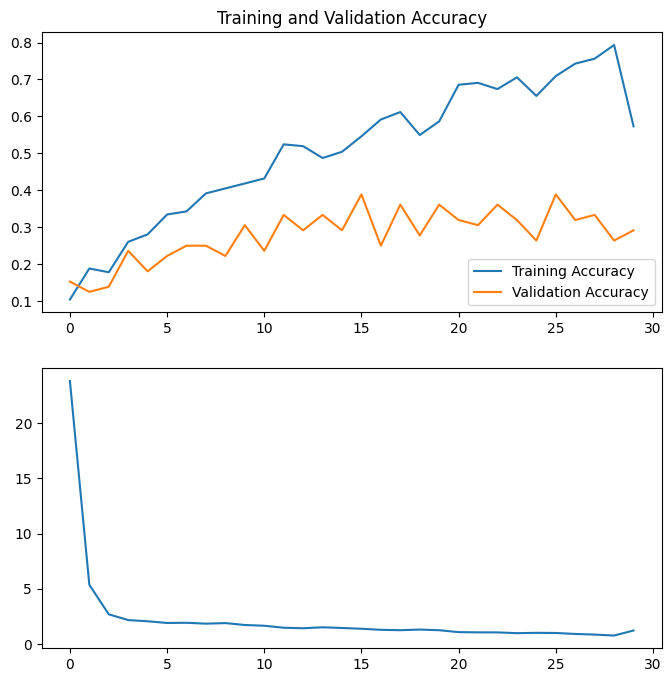

In [75]:
#importing libraries
import matplotlib.pyplot as plt

# Visualizing the training and validation loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt


In [76]:
import numpy as np

# Calculate the predictions for the test images
predictions = model.predict(test_generator)

# Get the true labels for the test images
true_labels = test_generator.classes

# Get the top-1 predictions
top_1_predictions = np.argmax(predictions, axis=-1)

# Calculate the top-1 error rate
top_1_error_rate = np.mean(top_1_predictions != true_labels)

# Print the top-1 error rate
print(f"Top-1 error rate: {top_1_error_rate:.3f}")

# Get the top-5 predictions
top_5_predictions = np.argsort(predictions, axis=-1)[:, -5:]

# Check if the true label is in the top-5 predictions
top_5_correct = np.any(top_5_predictions == true_labels[:, None], axis=-1)

# Calculate the top-5 error rate
top_5_error_rate = 1 - np.mean(top_5_correct)

# Print the top-5 error rate
print(f"Top-5 error rate: {top_5_error_rate:.3f}")


3/3 [==============================] - 9s 2s/step
Top-1 error rate: 0.922
Top-5 error rate: 0.494


In [77]:
# Evaluate the model on the test dataset
scores = model.evaluate_generator(test_generator, steps=len(test_generator))
print("Accuracy on test dataset: %.2f%%" % (scores[1]*100))


/var/folders/8x/2l96kkzn7hs053kqw5nwhwxw0000gn/T/ipykernel_7474/4180915168.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=len(test_generator))


Accuracy on test dataset: 28.57%
